# Two use cases of FAIR maturity indicators in the life sciences - FAIR balloon plot of Dunning et al.

by [Serena Bonaretti](https://sbonaretti.github.io), Maastricht University

In this notebook, we show how the FAIR balloon plot can be extended to visualize FAIR assessment for different studies. We use the data from:
 
Are the FAIR Data Principles fair?  
Alastair Dunning, Madeleine De Smaele, Jasmin Böhmer  
International Journal of Digital Curation (1970-01-01) https://doi.org/gf4bnb  
DOI: 10.2218/ijdc.v12i2.567  
 
We transformed the results available at their [institutional repository](https://data.4tu.nl/repository/uuid:5146dd06-98e4-426c-9ae5-dc8fa65c549f) to numerical values. We created [a new spead sheet](https://github.com/sbonaretti/FAIR_metrics/blob/master/code/dunning.csv) where we converted:   

- "complies completely" to 1,  
- "just about/maybe not" to 0.5, and 
- "fails to comply" to 0.   

We did not assign any value to "unclear", which is thus represented as missing elements.

In [1]:
import os
import pandas as pd

In [2]:
# Import R for visualization using ggplot2 - comment if used in mybinder, uncomment if used locally
#os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # put here your own R directory 

In [3]:
%load_ext rpy2.ipython

In [4]:
#%%R
# Install ggplot2 and svglite if they are not already installed (to be done only once)
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("svglite", repos='http://cran.us.r-project.org', quiet=TRUE)

#### Import dataset

In [5]:
df = pd.read_csv("./dunning.csv")
df

,DANSEASY,EUDATB2Share,Zenodo,PseudoBase,OpenML,ProfilesRegistry,MendeleyData,4TU,CancerData.org,DHSDataAccess,...,MycoBank,AlgaeBase,AmsterdamCohortStudies,ICTWSS,ShareERIC,LOVD3,CARIBIC,EIDA,SoundAndVision,Figshare
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0
1,1.0,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.5,0.0,0.0,0.5,1.0,0.0,NaN,0.5,1.0
2,1.0,1.0,0.5,0.0,0.5,0.5,1.0,1.0,1.0,0.5,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,0.5,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.5,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# add criteria for plotting
principles         = ["F",      "F",         "F",         "F",      "A",         "A",         "A",         "A",         "I",       "I",             "I",      "R",         "R",         "R"          ,"R"]
metric_names       = ["F1",     "F2",        "F3",        "F4",     "A1",        "A11",       "A12",       "A2",        "I1",      "I2",            "I3",     "R1",        "R11",       "R12"        ,"R13" ]
retrieval_type     = ["manual", "manual", "manual", "manual", "manual", "manual", "manual", "manual", "manual",  "manual",  "manual", "manual", "manual", "manual" , "manual" ]
df["principles"]     = principles
df["metric_names"]   = metric_names
df["retrieval_type"] = retrieval_type

# display
pd.set_option("display.max_rows",df.shape[0])
df

,DANSEASY,EUDATB2Share,Zenodo,PseudoBase,OpenML,ProfilesRegistry,MendeleyData,4TU,CancerData.org,DHSDataAccess,...,ICTWSS,ShareERIC,LOVD3,CARIBIC,EIDA,SoundAndVision,Figshare,principles,metric_names,retrieval_type
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,NaN,0.0,1.0,F,F1,manual
1,1.0,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.5,1.0,0.0,NaN,0.5,1.0,F,F2,manual
2,1.0,1.0,0.5,0.0,0.5,0.5,1.0,1.0,1.0,0.5,...,1.0,0.0,1.0,0.0,NaN,1.0,1.0,F,F3,manual
3,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,0.5,NaN,...,0.0,1.0,1.0,0.0,NaN,1.0,1.0,F,F4,manual
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,A1,manual
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,A11,manual
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,A12,manual
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A2,manual
8,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.5,0.0,...,1.0,1.0,1.0,0.0,NaN,0.0,1.0,I,I1,manual
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I,I2,manual


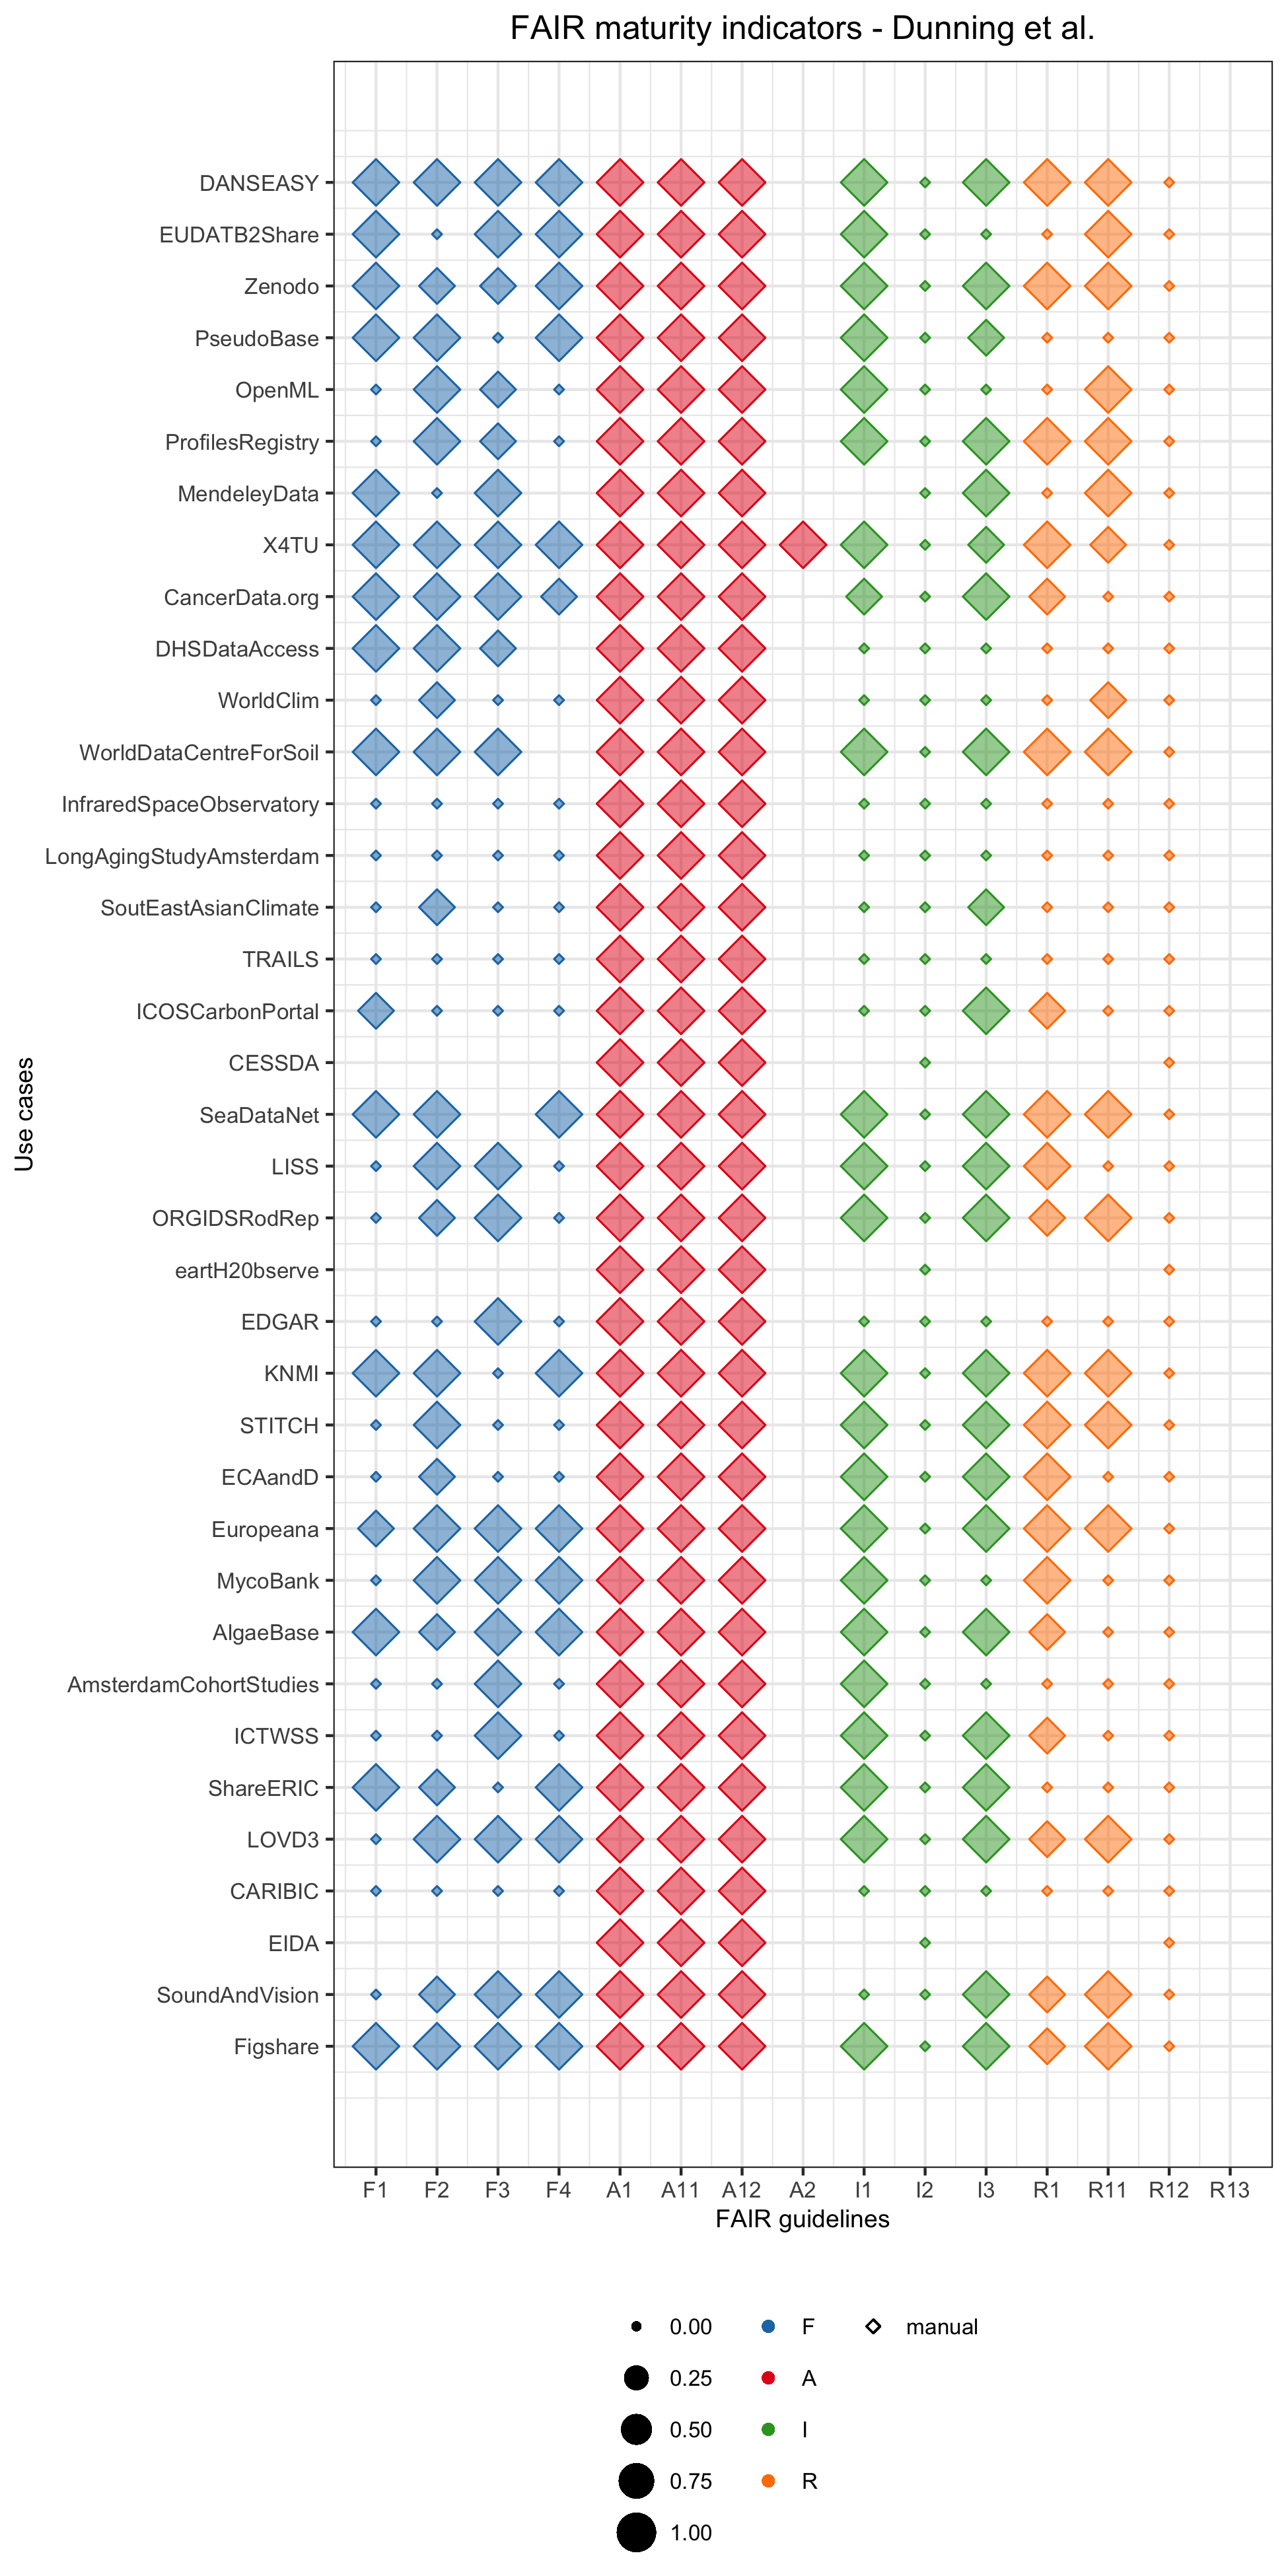

In [7]:
%%R -i df -w 6.5 -h 13 --units in -r 300

library(ggplot2)

# variables
y_values   <- seq(1, nrow(df))
y_values   <- sort(y_values, decreasing = TRUE)
n_of_cases <- ncol(df)-3
case_names <- rev(colnames(df)[1:n_of_cases])
# font size
title_text_size <- 12
axis_text_size  <- 9
tick_text_size  <- 8

# initiate graph
pl <- ggplot (data=df, aes(x=x_values1, y=y_values, color=principles, shape=retrieval_type))

# add cases in for loop
for (i in (1:n_of_cases)){

    # create a new dataframe with what needed for the current repository
    # (if one keeps indexes in geom_point, ggplot plots only the last very line - see https://stackoverflow.com/questions/18444620/set-layers-in-ggplot2-via-loop)
    gg.data <- data.frame(current_df=df[i], x_values=rep(i, nrow(df)), principles=df$principles, retrieval_type=df$retrieval_type)
   
    # change specific column name (e.g.DANSEASY) to a generic name
    colnames(gg.data)[1]<-"dataset"
    
    pl <- pl + 
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, color=principles, shape=retrieval_type)) + # add size, color, and shape
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, fill=principles, shape=retrieval_type), alpha=0.5, show.legend = FALSE) # add fill but do not show the legend (it would be the same as for color)
}

# add layers to plot
pl <- pl +
        # change shapes to squares, circles, and crosses
        scale_shape_manual(values = c(23)) +
        # background
        theme_bw() +  
        # flip x and y
        coord_flip()  +
        # axis ticks
        scale_x_reverse(limits=c(n_of_cases+0.5,0.5), breaks=seq(n_of_cases,1,-1), labels=case_names) + #,  labels=c(colnames(df)[4], colnames(df)[3], colnames(df)[2], colnames(df)[1])) + 
        scale_y_reverse(limits=c(15, 1),   breaks=seq(15,1,-1), labels=df$metric_names) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) +
        # axis text
        xlab ("Use cases") +
        ylab ("FAIR guidelines") +
        theme(text = element_text( size = axis_text_size)) + 
        # change colors for lines
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00") ,
                           labels = c("F", "A", "I", "R"),
                           breaks = c("F", "A", "I", "R")
                          ) +  
        # change colors for fills
        scale_fill_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00")) +
        # title
        ggtitle("FAIR maturity indicators - Dunning et al.") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5))  +
        # legend - colors
        theme(legend.text = element_text(size=tick_text_size), legend.key.size = unit(0.2, "cm")) + 
        labs(color="") +                             # no legend title   
        labs(size="")  +                             # no legend title 
        labs(shape="") +                             # no legend title 
        theme (legend.spacing.x = unit(0.1, "cm"),   # reduce horizontal space between legends
               legend.box = "horizontal",            # put legends next to each other
               legend.direction = "vertical",        # 
               legend.position = "bottom",           # under the graph
               legend.key.size = unit(1.3, 'lines'), # space better legend items
               legend.margin=margin(c(1,7,1,1))) +   # margin around each legend 
        guides(color = guide_legend(order=2),        # change legend order
               size  = guide_legend(order=1),
               shape = guide_legend(order=3))
        
# display
pl


In [8]:
%%R 
# requires the package "svglite" to save as svg
#ggsave("dunning.svg", plot = last_plot(), width=6.5, height=14, dpi=300) # comment if used in mybinder, uncomment if used locally 

<a name="dependencies"></a>
## Dependencies 

In [9]:
%reload_ext watermark
%watermark -v -m -p bs4,os,pandas,requests,xml.etree.ElementTree,io
print ("")
%watermark -u -n -t -z

CPython 3.7.3
IPython 7.4.0

bs4 4.7.1
os unknown
pandas 0.24.2
requests 2.21.0
xml.etree.ElementTree unknown
io unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

last updated: Sun Aug 11 2019 11:29:53 CEST


In [10]:
%%R
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS:   /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gdtools_0.1.9 ggplot2_3.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.2       svglite_1.2.2    digest_0.6.20    crayon_1.3.4    
 [5] withr_2.1.2      grid_3.6.1       gtable_0.3.0     scales_1.0.0    
 [9] pillar_1.4.2     rlang_0.4.0      lazyeval_0.2.2   labeling_0.3    
[13] munsell_0.5.0    compiler_3.6.1   pkgconfig_2.0.2  colorspace_1.4-1
[17] tibble_2.1.3    


In [11]:
%watermark -u -n -t -z

last updated: Sun Aug 11 2019 11:29:54 CEST
